### This file plots the processed csv files with matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [2]:
date = '2018-10-28_21h33'
worker_list = [8,16]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/' + date + '/'

## Throughput plot for read loads

In [3]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'one_mw_tp.csv')
df_tp

,client,worker,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,2,8,2580.0,1061.0,1672.5,19.7
1,2,16,1643.9,46.1,1703.7,6.7
2,4,8,2981.5,59.3,3160.0,37.2
3,4,16,3000.3,108.3,3038.9,9.1


In [4]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

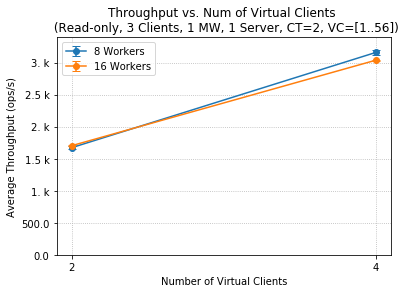

In [8]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['read_tp_mean']
    std = df_tp_cut['read_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=1e3+np.mean(df_tp['read_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_tp_read.png", dpi = 150)


## Throughput plot for write loads

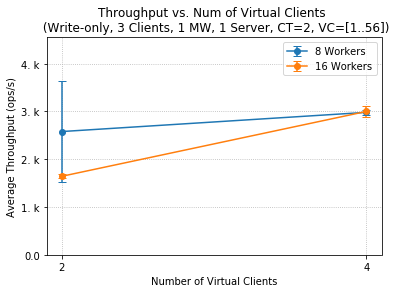

In [11]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_tp_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_cut['client']
    tps = df_tp_cut['write_tp_mean']
    std = df_tp_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0,top=2e3+np.mean(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_tp_write.png", dpi = 150)


## Response-time plot for read loads

In [12]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'one_mw_rt.csv')
df_rt

,client,worker,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,2,8,1.577903,0.144322,1.499810,0.024316
1,2,16,1.621820,0.043514,1.504576,0.025601
2,4,8,1.714626,0.040074,1.572480,0.045016
3,4,16,1.717014,0.042246,1.655553,0.010635


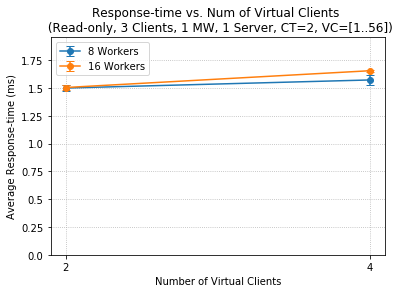

In [25]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['read_rt_mean']
    std = df_rt_cut['read_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['read_rt_mean'])+0.3)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_read.png", dpi = 150)


## Response-time plot for write loads

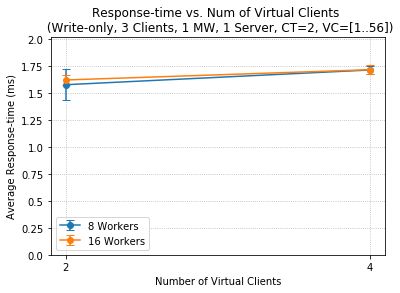

In [26]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+0.3)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_read.png", dpi = 150)


## Queue length plot for read loads

In [4]:
# read data into pandas dataframe
df_ql = pd.read_csv(base_path + 'one_mw_queuelength.csv')
df_ql

,client,worker,read_queueLength,read_queueLength_std,write_queueLength,write_queueLength_std
0,2,8,1.356882,0.014488,1.316671,0.089811
1,2,16,1.361042,0.016094,1.231688,0.012398
2,4,8,1.762403,0.045867,1.514897,0.017463
3,4,16,1.755700,0.109637,1.527288,0.019196


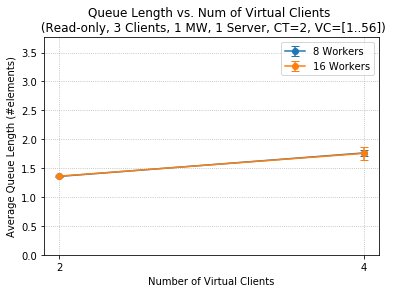

In [8]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['read_queueLength']
    std = df_ql_cut[' read_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['read_queueLength'])+2)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_queuelength_read.png", dpi = 150)


## Queue length plot for write loads

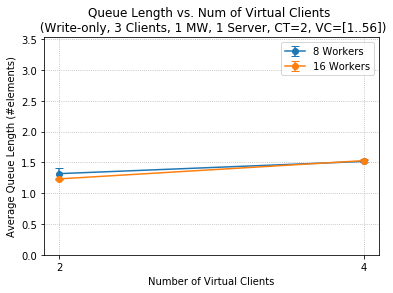

In [10]:
f = plt.figure()
plt.title("Queue Length vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_ql_cut = df_ql[(df_ql.worker == worker)]
    
    vcs = df_ql_cut['client']
    tps = df_ql_cut['write_queueLength']
    std = df_ql_cut['write_queueLength_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Queue Length (#elements)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_ql['write_queueLength'])+2)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_queuelength_write.png", dpi = 150)


## Response-time breakdown histogram for read loads

In [4]:
# read data into pandas dataframe
df_b = pd.read_csv(base_path + 'one_mw_rt_breakdown.csv')
df_b

,client,worker,read_netthreadTime,read_queueTime,read_workerPreTime,read_memcachedRTT,read_workerPostTime,write_netthreadTime,write_queueTime,write_workerPreTime,write_memcachedRTT,write_workerPostTime
0,2,8,0.039306,0.101060,0.023353,1.313723,0.022367,0.050202,0.109411,0.019734,1.351865,0.046691
1,2,16,0.036899,0.105611,0.021792,1.317220,0.023054,0.053082,0.096910,0.021390,1.402191,0.048247
2,4,8,0.039163,0.144789,0.022265,1.342906,0.023357,0.060622,0.151511,0.027901,1.401644,0.072948
3,4,16,0.040060,0.153140,0.022630,1.416117,0.023607,0.062932,0.146079,0.023551,1.424275,0.060178


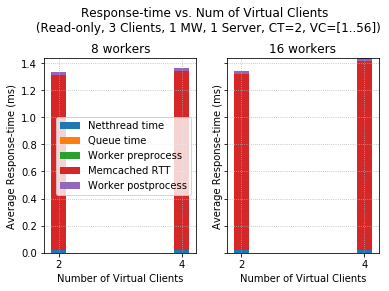

In [17]:
#f = plt.figure()
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")
f.subplots_adjust(top=0.8)
i=0
for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['read_netthreadTime']
    queue_time = df_b_cut['read_queueTime']
    workerPreTime = df_b_cut['read_workerPreTime']
    memcachedRTT = df_b_cut['read_memcachedRTT']
    workerPostTime = df_b_cut['read_workerPostTime']

    width = 0.25       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_breakdown_read.png", dpi = 150)


## Response-time breakdown histogram for write loads

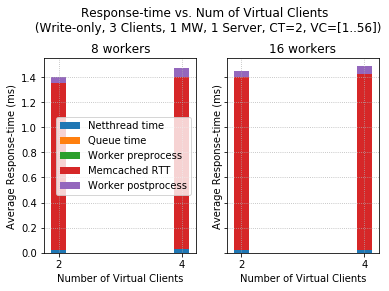

In [18]:
#f = plt.figure()
f, ax = plt.subplots(1, len(worker_list), sharex='col', sharey='row')
f.suptitle("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")
f.subplots_adjust(top=0.8)


i=0
for worker in worker_list:
    # extract values of interest
    df_b_cut = df_b[(df_b.worker == worker)]
    
    vcs = df_b_cut['client']
    net_time = df_b_cut['write_netthreadTime']
    queue_time = df_b_cut['write_queueTime']
    workerPreTime = df_b_cut['write_workerPreTime']
    memcachedRTT = df_b_cut['write_memcachedRTT']
    workerPostTime = df_b_cut['write_workerPostTime']

    width = 0.25       # the width of the bars: can also be len(x) sequence
    ax[i].bar(vcs, net_time, width, label='Netthread time')
    ax[i].bar(vcs, queue_time, width, bottom=net_time, label='Queue time')
    ax[i].bar(vcs, workerPreTime, width, bottom=queue_time, label='Worker preprocess')
    ax[i].bar(vcs, memcachedRTT, width, bottom=workerPreTime, label='Memcached RTT')
    ax[i].bar(vcs, workerPostTime, width, bottom=memcachedRTT, label='Worker postprocess')

    ax[i].grid(linestyle = "dotted")
    ax[i].set_ylabel("Average Response-time (ms)")
    ax[i].set_xlabel("Number of Virtual Clients")
    ax[i].set_xticks([0] + np.array(vcs))
    ax[i].set_ylim(bottom=0)
    ax[i].set_title('{} workers'.format(worker))
    if i==0:
        ax[i].legend()
    
    i += 1

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/one_mw_rt_breakdown_write.png", dpi = 150)
